In [ ]:
# f = (f' - B - d * t) / med (f' - b - d * t)
# D = D' - B
# B = B' + Berr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# parameters
# gain electrons per adu
g = 3.6
# dimension 
row = 2048
column = 2048
# bias levels 
# real bias level count per pixel 
bias_real_level = 300
# the systematic readout error on the bias
readnoise = 5
# assumed bias level 
# float up to factor 
factor = 2 
bias_meas_array = np.linspace(bias_real_level/factor, bias_real_level*factor)
# bias_meas_array = [bias_real_level]
# dark
# dark current elec per sec
d = 0.05
# time dark exposure
td = 60
# flat counts per pixel 
f = 10000
# time flat exposure 
tf_array = np.linspace(3, 120)

In [ ]:
para_dict = {
    'bias_level': 300,
    'row': 2048,
    'column': 2048,
    'g': 3.6,
    'readnoise': 5,
    'd': 0.05,
    'td': 60,
    'f': 10000,
    'tf_array': np.linspace(3, 120)   
}

In [ ]:
# function making a bias based on a given bias input
# normal distributed 
# output: 2d bias level in counts per pixel 
def makeBias(bias_level,size=(row,column),readnoise=5,debug=False):
    bias = np.random.normal(bias_level, readnoise, size)
    return bias

In [ ]:
def makeDarkCounts(td=60,d=0.05,size=(row,column),debug=False,g=3.6):
    dark_counts = np.random.poisson(d*td, size) / g 
    return dark_counts

In [ ]:
# dark function based on a given bias input
# possion distributed
# output: 2d dark current in counts per sec per pixel 
def makeDark(bias_level,td=60,d=0.05,size=(row,column),debug=False,g=3.6):
    dark = makeDarkCounts(td=td,d=d,size=size,debug=debug,g=g) + \
                              makeBias(bias_level,size=size,debug=debug)
    return dark    

In [ ]:
# flat function 
# possion distributed 
# output: 2d raw flat level in counts per pixel 
def makeRawFlat(bias_level,debug=False,g=3.6,
                f=15000,size=(row,column)):
    flat = makeBias(bias_level) + np.random.poisson(f, size)
    return flat

In [ ]:
# calibrated flat function 
# output: 2d calibrated flat level in counts per pixel 
def makeCaliFlat(bias, dark, raw_flat, tf=3, td=60, debug = False):
    caliFlat = (raw_flat - dark / td * tf - bias) / np.median(raw_flat - dark / td * tf - bias)
    return caliFlat 

11200.986466210985

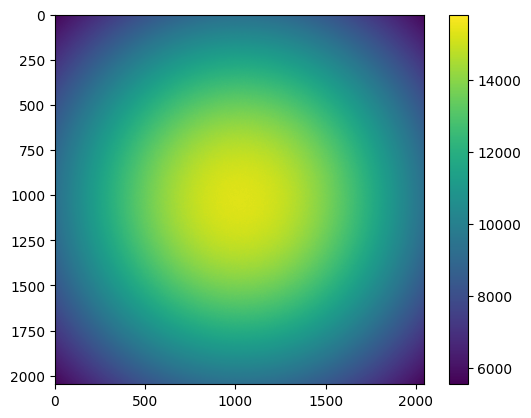

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generate_custom_gaussian_circle(resolution, center_value, sigma, edge_value):
    center_x, center_y = resolution / 2, resolution / 2
    grid = np.zeros((resolution, resolution))
    
    for x in range(resolution):
        for y in range(resolution):
            distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            # Calculate the Gaussian-like value with a custom mean
            value = (np.random.normal(300, 5) + np.random.poisson(center_value)) * np.exp(-0.5 * (distance / sigma)**2) 
            
            # Clamp values to be within [edge_value, center_value]
            # value = max(edge_value, min(center_value, value))
            
            # Assign the value to the grid
            grid[x, y] = value
    
    return grid

resolution = 2048
center_value = 15000  # Adjust this value for the center peak
edge_value = 0.0    # Adjust this value for the edge
sigma = 1024           # Adjust this value to control the spread of values

custom_gaussian_circle = generate_custom_gaussian_circle(resolution, center_value, sigma, edge_value)
display(np.mean(custom_gaussian_circle))

plt.imshow(custom_gaussian_circle, cmap='viridis')
plt.colorbar()
plt.show()



0.858871123295735

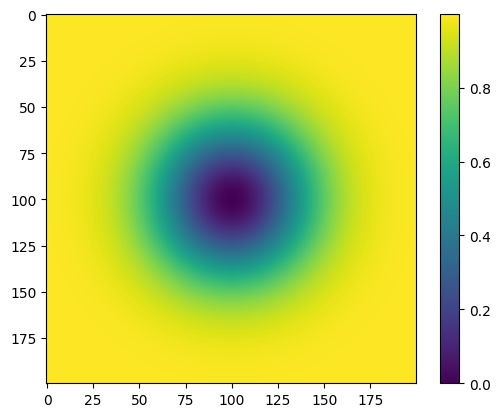

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generate_custom_gaussian_circle(esolution, mean_value, sigma):
    center_x, center_y = resolution / 2, resolution / 2
    grid = np.zeros((resolution, resolution))
    
    for x in range(resolution):
        for y in range(resolution):
            distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            
            # Calculate the value as a linear relationship between mean_value at the center
            # and a lower value (0) at the edge, based on the distance from the center.
            value = mean_value * (1 - np.exp(-0.5 * (distance / sigma)**2))
            
            # Clamp values to be within [0, mean_value]
            value = max(0, min(mean_value, value))
            
            # Assign the value to the grid
            grid[x, y] = value
    
    return grid

resolution = 200
mean_value = 1.0  # Adjust this value for the desired mean value
sigma = 30       # Adjust this value to control the spread of values

custom_gaussian_circle = generate_custom_gaussian_circle(resolution, mean_value, sigma)
display(np.mean(custom_gaussian_circle))

plt.imshow(custom_gaussian_circle, cmap='viridis')
plt.colorbar()
plt.show()


In [88]:
bias_real = makeBias(bias_real_level)
dark_real = makeDark(bias_real_level)

bias_meas = makeBias(600)
dark_meas = makeDark(600)
flat_meas = makeRawFlat(600)

flat_cali = makeCaliFlat(bias_real, dark_real, flat_meas, 120)
flat_fake = makeCaliFlat(bias_meas, dark_meas, flat_meas, 120)

display(flat_cali)
display(flat_fake)

p = (flat_fake - flat_cali) / flat_fake * 100
display(p)

array([[1.00630568, 1.00539491, 0.99257674, ..., 0.99667314, 1.00904773,
        1.00032175],
       [0.97856802, 0.99121717, 1.01079211, ..., 0.99865752, 1.00679639,
        0.98629133],
       [1.00220947, 0.98756414, 1.00044593, ..., 1.01308819, 0.99382841,
        0.99425231],
       ...,
       [0.98759527, 1.00110353, 0.98778714, ..., 0.99268162, 0.99917061,
        0.99520159],
       [0.9921498 , 0.99084694, 1.00243291, ..., 1.01722537, 1.00094271,
        0.99929328],
       [0.99873359, 1.00934522, 0.9960711 , ..., 1.00563574, 0.99951799,
        0.99407712]])

array([[1.00612403, 1.00435515, 0.99418274, ..., 0.99681788, 1.01062193,
        1.00103247],
       [0.9762626 , 0.98987739, 1.01137963, ..., 0.99844263, 1.00675916,
        0.98488142],
       [1.00116919, 0.98657957, 0.99884091, ..., 1.01243197, 0.99384945,
        0.99255825],
       ...,
       [0.98877482, 1.00050845, 0.98637593, ..., 0.99380705, 1.00018314,
        0.99425171],
       [0.99052546, 0.99249837, 1.00066406, ..., 1.01822958, 1.00208358,
        0.99979799],
       [0.99824974, 1.00955738, 0.99487715, ..., 1.00722142, 0.99945912,
        0.9927618 ]])

array([[-0.01805085, -0.10341768,  0.16180074, ...,  0.01452159,
         0.15600917,  0.07104919],
       [-0.2355915 , -0.13516503,  0.05812469, ..., -0.02151773,
        -0.00369741, -0.14295069],
       [-0.1037986 , -0.09969654, -0.16043003, ..., -0.06477441,
         0.00211712, -0.17038479],
       ...,
       [ 0.11943636, -0.05944246, -0.14286632, ...,  0.11337253,
         0.10133699, -0.09544585],
       [-0.16371958,  0.16666794, -0.17645553, ...,  0.09872061,
         0.11398025,  0.05050661],
       [-0.04844599,  0.02101933, -0.11986607, ...,  0.15767933,
        -0.00589015, -0.13231572]])

In [ ]:
def systematic_deviation(bias_level, time = 1, tf_array = tf_array, debug = False):
    # see the error with same bias 
    percent_change_in_flat_array = []
    percent_change_in_flat_array_std = []
    tf_plot_array = []
    for tf in tf_array:
        percent_change_in_flat_array_storage = []
        for i in range(time):
            bias_real_1 = makeBias(bias_level)
            dark_real_1 = makeDark(bias_level)
            flat_raw_1 = makeRawFlat(bias_level, tf)
            flat_real_1 = makeCaliFlat(bias_real_1, dark_real_1, flat_raw_1, tf)
            bias_real = makeBias(bias_level)
            dark_real = makeDark(bias_level)
            flat_raw = makeRawFlat(bias_level, tf)
            flat_real = makeCaliFlat(bias_real, dark_real, flat_raw, tf)
            deltaf = np.abs(flat_real - flat_real_1)
            # flat percent change in a mean form 
            percent_change_in_flat = np.mean(deltaf / flat_real_1 * 100)
            percent_change_in_flat_array_storage.append(percent_change_in_flat)
        mean = np.mean(percent_change_in_flat_array_storage)
        std = np.std(percent_change_in_flat_array_storage)
        percent_change_in_flat_array.append(mean)
        percent_change_in_flat_array_std.append(std)
        tf_plot_array.append(tf)
    plt.scatter(tf_plot_array, percent_change_in_flat_array)
    plt.errorbar(tf_plot_array, percent_change_in_flat_array,
                yerr = percent_change_in_flat_array_std,
                fmt ='o')
    plt.xlabel('TF changes')
    plt.ylabel('Flat changes perc')
    plt.show()
    

In [ ]:
systematic_deviation(bias_real_level)

In [ ]:
def func(xy, a, b, c, d, e, f):
    x, y = xy
    return a + b*x + c*y + d*x**2 + e*y**2 + f*x*y

In [ ]:
def propagation(bias_real_level = bias_real_level, bias_meas_array = bias_meas_array, tf_array = tf_array, debug = False):
    # prop storage array
    percent_change_in_bias_array = []
    percent_change_in_flat_array = []
    tf_plot_array = []

    # making the real bias, dark, and flat
    bias_real = makeBias(bias_real_level)
    dark_real = makeDark(bias_real_level)
    flat_raw = makeRawFlat(bias_real_level)
    flat_real_dict = {}
    for tf in tf_array:
        flat_real = makeCaliFlat(bias_real, dark_real, flat_raw, tf)
        flat_real_dict[tf] = flat_real
        
    if debug:
        display(flat_real_dict[tf_array[1]])
        
    # prop 
    for b in bias_meas_array:
        # measured bias 2d array
        bias_meas = makeBias(b)
        # bias displacement
        deltab = bias_meas - bias_real
        # bias percent change mean
        percent_change_in_bias = np.mean(deltab / bias_real * 100)
        # measured dark 
        dark_meas = makeDark(b)
        # measured raw flat in a 2d array
        flat_raw = makeRawFlat(b)
        for tf in tf_array:
            # real calibrated flat in a 2d array 
            flat_real = flat_real_dict[tf]
            # measured flat in a 2d array
            flat_meas = makeCaliFlat(bias_meas, dark_meas, flat_raw, tf)
            # flat displacement in a 2d 
            deltaf = np.abs(flat_meas - flat_real)
            # flat percent change in a mean form 
            percent_change_in_flat = np.mean(deltaf / flat_real * 100)
            percent_change_in_bias_array.append(percent_change_in_bias)
            percent_change_in_flat_array.append(percent_change_in_flat)
            tf_plot_array.append(tf)
            
    if debug:
        ax = plt.axes(projection='3d')
        # Adding data to our axes, 's=40' is to increase point size by 40
        ax.scatter3D(percent_change_in_bias_array, tf_plot_array, percent_change_in_flat_array, s=1) 
        # Labelling your axes
        ax.set_xlabel('Percent change in Bias')
        ax.set_ylabel('Time Flat Exposure')
        ax.set_zlabel('Percent change in Flat')
        
    
    # Perform curve fitting
    popt, pcov = curve_fit(func, (percent_change_in_bias_array, tf_plot_array), percent_change_in_flat_array)
    
    if debug: 
            
        X, Y = np.meshgrid(percent_change_in_bias_array, tf_plot_array)
        pred_flat_change = func((X, Y), *popt)
        
        ax = plt.axes(projection='3d')
        # Adding data to our axes, 's=40' is to increase point size by 40
        ax.scatter3D(percent_change_in_bias_array, tf_plot_array, percent_change_in_flat_array, s=1) 
        ax.plot_surface(X, Y, pred_flat_change, color='red', alpha=0.5)
        # Labelling your axes
        ax.set_xlabel('Percent change in Bias')
        ax.set_ylabel('Time Flat Exposure')
        ax.set_zlabel('Percent change in Flat')
        
    return popt, pcov
            
    

In [ ]:
popt, pcov = propagation(debug = True)